# Linear Regression from Scratch: Portfolio Project

This notebook demonstrates a implementation of linear regression using a custom gradient descent class. Its performance and results was compared to scikit-learn's `LinearRegression`.

## 1. Imports and Setup
We import all necessary libraries for data generation, modeling, and visualization.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 2. Custom Linear Regression Class
We use the custom `LinearRegressionGD` class implemented in `source/linear_regression.py`.

In [11]:
import sys
sys.path.append('../source')  # Ensure the source directory is in the path
from linear_regression import LinearRegressionGD

## 3. Data Generation
Generation of linear data with noise for a robust test.

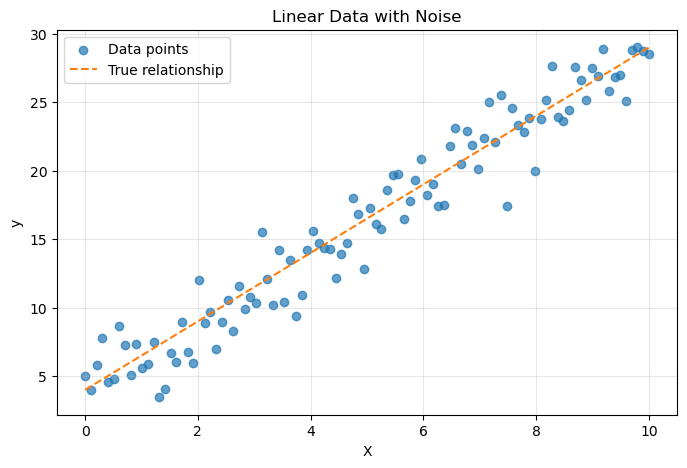

In [12]:
# True parameters of linear function (y = true_w *x + true_b).
true_w = 2.5
true_b = 4.0
np.random.seed(42)
X = np.linspace(0, 10, 100)
noise = np.random.normal(scale=2, size=X.shape)
y = true_w * X + true_b + noise

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X, y, alpha=0.7, color='C0', label='Data points')
ax.plot(X, true_w * X + true_b, color='C1', linestyle='--', label='True relationship')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Linear Data with Noise')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

## 4. Training the Custom Model
We train our custom model using Mean Squared Error (MSE) loss.

In [13]:
model_gd = LinearRegressionGD(lr=0.01, epochs=3000, loss='mse', verbose=True)
model_gd.fit(X, y)
print(f'Learned parameters: w = {model_gd.w:.4f}, b = {model_gd.b:.4f}')

[MSE] epoch=   0 loss=323.013537 w=2.0590 b=0.3258
[MSE] epoch= 300 loss=3.391025 w=2.6352 b=2.9384
[MSE] epoch= 600 loss=3.266255 w=2.5518 b=3.4935
[MSE] epoch= 900 loss=3.259954 w=2.5330 b=3.6182
[MSE] epoch=1200 loss=3.259636 w=2.5288 b=3.6462
[MSE] epoch=1500 loss=3.259620 w=2.5279 b=3.6525
[MSE] epoch=1800 loss=3.259619 w=2.5276 b=3.6540
[MSE] epoch=2100 loss=3.259619 w=2.5276 b=3.6543
[MSE] epoch=2400 loss=3.259619 w=2.5276 b=3.6544
[MSE] epoch=2700 loss=3.259619 w=2.5276 b=3.6544
Learned parameters: w = 2.5276, b = 3.6544


## 5. Training scikit-learn's LinearRegression
We fit the standard library model for comparison.

In [14]:
sk_model = LinearRegression()
sk_model.fit(X.reshape(-1, 1), y)
print(f'Scikit-learn parameters: w = {sk_model.coef_[0]:.4f}, b = {sk_model.intercept_:.4f}')

Scikit-learn parameters: w = 2.5276, b = 3.6544


## 6. Visual Comparison of Fits
We plot the predictions of both models against the data.

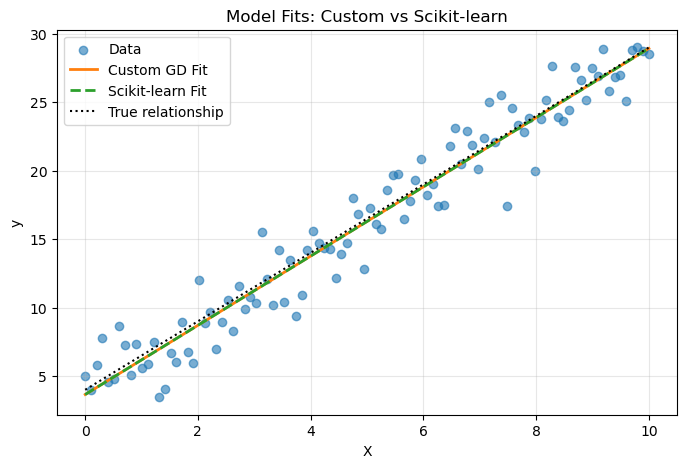

In [15]:
y_pred_gd = model_gd.predict(X)
y_pred_sk = sk_model.predict(X.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X, y, color='C0', alpha=0.6, label='Data')
ax.plot(X, y_pred_gd, color='C1', linewidth=2, label='Custom GD Fit')
ax.plot(X, y_pred_sk, color='C2', linewidth=2, linestyle='--', label='Scikit-learn Fit')
ax.plot(X, true_w * X + true_b, color='k', linestyle=':', label='True relationship')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Model Fits: Custom vs Scikit-learn')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

## 7. Training Loss Curve
We visualize the loss over epochs for our custom model.

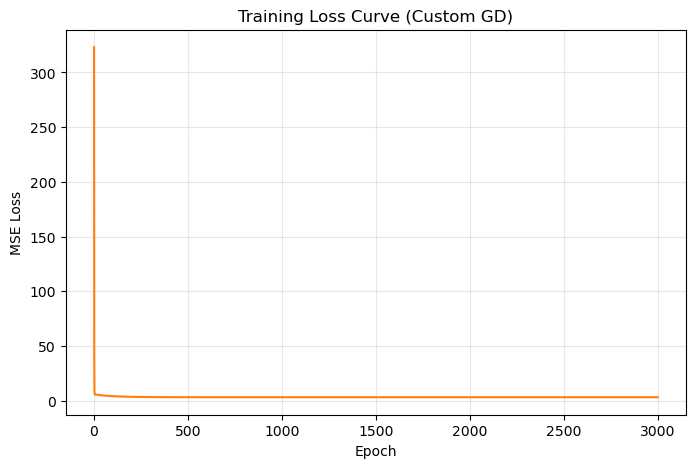

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(1, len(model_gd.loss_history)+1), model_gd.loss_history, color='C1')
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE Loss')
ax.set_title('Training Loss Curve (Custom GD)')
ax.grid(alpha=0.3)
plt.show()

## 8. Quantitative Comparison
We compare the models using MSE, MAE, and $R^2$ metrics.

In [17]:
def print_metrics(name, y_true, y_pred):
    print(f'{name:>18} | MSE: {mean_squared_error(y_true, y_pred):.4f} | MAE: {mean_absolute_error(y_true, y_pred):.4f} | R^2: {r2_score(y_true, y_pred):.4f}')
print('Model Performance:')
print_metrics('Custom GD', y, y_pred_gd)
print_metrics('Scikit-learn', y, y_pred_sk)

Model Performance:
         Custom GD | MSE: 3.2596 | MAE: 1.4299 | R^2: 0.9434
      Scikit-learn | MSE: 3.2596 | MAE: 1.4299 | R^2: 0.9434


## 9. Residual Analysis
We plot the residuals (errors) for both models to check for bias or patterns.

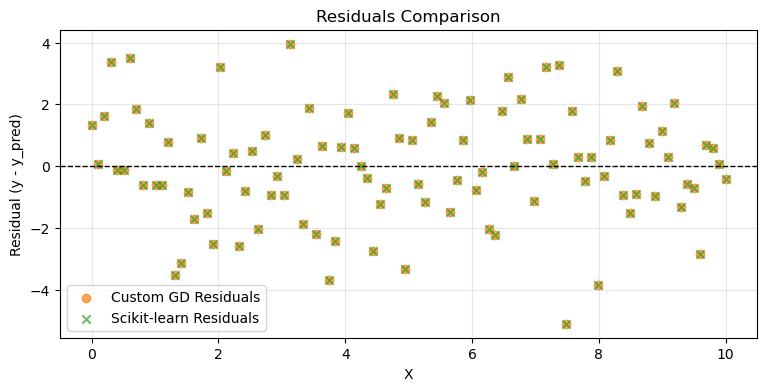

In [18]:
residuals_gd = y - y_pred_gd
residuals_sk = y - y_pred_sk
plt.figure(figsize=(9,4))
plt.scatter(X, residuals_gd, color='C1', alpha=0.7, label='Custom GD Residuals')
plt.scatter(X, residuals_sk, color='C2', alpha=0.7, label='Scikit-learn Residuals', marker='x')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel('X')
plt.ylabel('Residual (y - y_pred)')
plt.title('Residuals Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 10. Conclusion
- Custom gradient descent implementation closely matches scikit-learn's results.
- The training loss curve shows stable convergence.
- Residuals are well-behaved, indicating a good fit.

This notebook demonstrates a robust implementation of linear regression from scratch.